# COVID-19 Data Analysis

This code shows how to curve fit COVID-19 data into a suitable bell curve, test the accuracy of such curve and conduct calculations. I will use a few python libraries, such as pandas and matplotlib, to help handle data and plot graphs.





## Importing The Neccesary Python Libraries:
1. Pandas (Dataframe)
2. Numpy (Arrays and Exponents)
4. Math (Complex Operations and Constants)
5. Scipy.stats (Functions Related to Normal Distribution)
6. matplotlib.pyplot (Plotting and Graphing)

In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

## Importing Data From Excel using Pandas

Pandas utilizes a handy dataframe - that is a two-dimensional data structure, based on rows and columns. This can easily be converted into a numpy array which can be used for plotting/graphing curves etc

In [3]:
#stats = pd.read_csv("ThailandCorona.csv")
stats = pd.read_csv("JapanCorona.csv")
#stats = pd.read_csv("ItalyCorona.csv")
#stats = pd.read_csv("GermanyCorona.csv")
#stats = pd.read_csv("CanadaCorona.csv")
#stats = pd.read_csv("NewZealandCorona.csv")
#stats = pd.read_csv("SouthKoreaCorona.csv")

#stats = pd.read_csv("AustraliaCorona.csv")
#stats = pd.read_csv("SingaporeCorona.csv")
#stats = pd.read_csv("IndonesiaCorona.csv")


stats.tail()

,Country,Date,TotalCases,Deaths,NewCases,NewDeaths
154,NaN,3-Jun,16986,900,56,6
155,NaN,4-Jun,17018,903,32,3
156,NaN,5-Jun,17083,907,65,4
157,NaN,6-Jun,17103,914,20,7
158,NaN,7-Jun,17141,916,38,2


## CURVE FIT (Normal Distribution)

The Normal distribution seems to be a good fit for the daily cases/deaths of COVID-19.

To show this data visually, I will graph these curves.

1. Taking an array of values from day 30/70 onwards (some countries receive virus later) for:

    -Days

    -Cases

    -Deaths


2. Created bell curve function using python operations

3. Calculations of mean and standard deviation for both cases and deaths using weighted average

4. Plotting Gaussian curves for both cases and deaths on same coordinate axis along with actual cases/deaths with matplotlib.pyplot

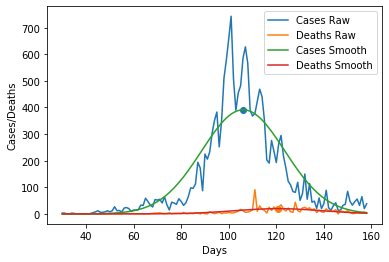

In [10]:
start_date = 30

xraw = stats.Date
xdata = xraw.loc["30":].index # <80

yraw = stats.NewCases
ydata = yraw.loc["30":] 

zraw = stats.NewDeaths
zdata = zraw.loc["30":] 


def Func (x,mean,std,T):
    expo = -(x-mean)**2 / (2*std**2)
    return (T/(std*math.sqrt(2*math.pi))*np.exp(expo))  
ydata
caseWA = 0 #i*x weighted average
caseT = 0
caseVar = 0
w = start_date
x = start_date

deathWA = 0
deathT = 0
deathVar = 0
y = start_date
z = start_date

for i in ydata:
    
    caseWA+=i*w
    caseT+=i
    w+=1

meanCase = caseWA / caseT

for i in ydata:
    
    caseVar+=(i*(x-meanCase)**2)
    x+=1
    
stdCase = math.sqrt(caseVar/caseT)

for i in zdata:
    
    deathWA+=i*y
    deathT+=i
    y+=1

meanDeath = deathWA / deathT

for i in zdata:

    deathVar+=(i*(z-meanDeath)**2)
    z+=1
    
stdDeath = math.sqrt(deathVar/deathT)


#tried popt pcov didnt work

y_fit = Func(xdata, meanCase, stdCase, caseT)
z_fit = Func(xdata, meanDeath, stdDeath, deathT)

plt.figure(figsize=(6,4))
plt.plot(xdata,ydata, label = 'Cases Raw')
plt.plot(xdata,zdata, label = 'Deaths Raw')

plt.plot(xdata, y_fit, label = 'Cases Smooth')
plt.plot(xdata, z_fit, label = 'Deaths Smooth')

plt.legend(loc = 1)

plt.xlabel('Days')
plt.ylabel('Cases/Deaths')

plt.scatter(meanCase,Func(meanCase, meanCase, stdCase, caseT))
plt.scatter(meanDeath,Func(meanDeath, meanDeath, stdDeath, deathT))

## Chi-Squared Test (For Normal Distribution)

From the previous lines of code, it seems that the data does follow a bell curve.

To confirm, we will conduct a chi squared test:

Observed data is the actual data in the excel sheet

Expected data is calculated using the bell curve with the given parameters calculated before

The test statistic is calculated as follows:

$$ \chi^2 = \sum_{i=1}^{n} (\frac {(O_{i}-E_{i})^2}{E_{i}}) $$

### Cases and Deaths

In [5]:
# using meanCase, stdCase, caseT from b4
intervalLength = 20

caseRT = 0
case_prevts = 0
case_cumulProb = 0
case_cumulExpec = 0
case_cumulObv = 0

case_prevObv = 0
case_observedInterval = 0
case_finalInterval = 0
case_observedCount = 0
case_probabilityInterval = 0
case_expectedValue = 0

case_degFreedom = 0
case_noDataExpec = 0
case_noDataObv = 0
case_noDataChi = 0

case_datas = round(len(ydata)/intervalLength)+1
case_expecArr = np.zeros(case_datas)
case_obvArr = np.zeros(case_datas)
case_chiArr = np.zeros(case_datas)
case_sumChiArr = 0

minimum = start_date
maximum = len(ydata) + start_date

for i in yraw:
    
    caseRT += i


def probabilityNormalize(ts,mean,std):
    
    normalized = (ts - mean)/std
    return(st.norm.cdf(normalized))

    #EXPECTED PROBABILITY
    
for ts in range(maximum):
    
    if ts%intervalLength == 0 and ts>=minimum and ts<maximum:
        
        
        case_probabilityInterval = probabilityNormalize(ts,meanCase,stdCase) - probabilityNormalize(case_prevts,meanCase,stdCase)
        case_expectedValue = case_probabilityInterval * caseRT
        
        #print("EP From " + str(case_prevts) + " to " + str(ts) + ": " + str(case_probabilityInterval))
        #print("Expected Value: " + str(case_expectedValue))
        #print()
        case_expecArr[case_noDataExpec] = round(case_expectedValue)
        
        case_cumulProb = probabilityNormalize(ts,meanCase,stdCase)
        case_cumulExpec += case_expectedValue
        case_prevts = ts
        case_noDataExpec +=1
        
#print("EP From " + str(case_prevts) + " onwards: " + str(1-case_cumulProb))
#print("Expected Value: " + str(caseRT - case_cumulExpec))
#print()
case_expectedValue = caseRT - case_cumulExpec
case_expecArr[case_noDataExpec] = round(case_expectedValue)
    
    #OBSERVED
    
for i in yraw:
    
    case_cumulObv +=i
    case_observedInterval +=i
    case_observedCount +=1
    
    if case_observedCount%intervalLength == 0 and case_observedCount>=minimum and case_observedCount<maximum:
        
        
        #print("Observed from " + str(prevObv) + " to " + str(observedCount) + ": " + str(observedInterval))
        case_obvArr[case_noDataObv] = case_observedInterval
        case_prevObv = case_observedCount
        case_finalInterval = caseRT - case_cumulObv
        case_observedInterval = 0
        case_noDataObv +=1
        
#print("Observed from " + str(prevObv) + " Onwards: " + str(observedInterval)) 

case_obvArr[case_noDataObv] = case_observedInterval

for i in range(case_datas):

    
    if case_expecArr[case_noDataChi] == 0:
        
        case_chiValue = 0
    
    else:
        case_chiValue = abs((case_obvArr[case_noDataChi] - case_expecArr[case_noDataChi])/case_expecArr[case_noDataChi])
        
    case_chiArr[case_noDataChi] = round(case_chiValue, 3)
    case_noDataChi +=1
    
for i in case_chiArr:
    case_sumChiArr +=i
    case_roundSumChiArr = round(case_sumChiArr,3)

case_degFreedom = case_datas-3

# chi2(0.9) means 10% sig level 4.61
#slightly confused with sig level
#Checking at 10% sig level

if(case_roundSumChiArr < 4.61):
    print("Good Fit to 10% significance level")
else:
    print("Not Normally Distributed")
    

    
# using meanDeath, stdDeath, deathT from b4

deathRT = 0
death_prevts = 0
death_cumulProb = 0
death_cumulExpec = 0
death_cumulObv = 0

death_prevObv = 0
death_observedInterval = 0
death_finalInterval = 0
death_observedCount = 0
death_probabilityInterval = 0
death_expectedValue = 0

death_degFreedom = 0
death_noDataExpec = 0
death_noDataObv = 0
death_noDataChi = 0

death_datas = round(len(ydata)/intervalLength) +1
death_expecArr = np.zeros(death_datas)
death_obvArr = np.zeros(death_datas)
death_chiArr = np.zeros(death_datas)

death_sumChiArr = 0


for i in zraw:
    
    deathRT += i

    #EXPECTED PROBABILITY
    
for ts in range(maximum):
    
    if ts%intervalLength == 0 and ts>=minimum and ts<maximum:
        
        
        death_probabilityInterval = probabilityNormalize(ts,meanDeath,stdDeath) - probabilityNormalize(death_prevts,meanDeath,stdDeath)
        death_expectedValue = death_probabilityInterval * deathRT
        
        death_expecArr[death_noDataExpec] = round(death_expectedValue)
        
        death_cumulProb = probabilityNormalize(ts,meanDeath,stdDeath)
        death_cumulExpec +=death_expectedValue
        death_prevts = ts
        death_noDataExpec +=1

death_expectedValue = deathRT - death_cumulExpec
death_expecArr[death_noDataExpec] = round(death_expectedValue)
    
    #OBSERVED
    
for i in zraw:
    
    death_cumulObv +=i
    death_observedInterval +=i
    death_observedCount +=1
    
    if death_observedCount%intervalLength == 0 and death_observedCount>=minimum and death_observedCount<maximum:
        
        death_obvArr[death_noDataObv] = death_observedInterval
        death_prevObv = death_observedCount
        death_finalInterval = deathRT - death_cumulObv
        death_observedInterval = 0
        death_noDataObv +=1
        
death_obvArr[death_noDataObv] = death_observedInterval 

for i in range(death_datas):

    if death_expecArr[death_noDataChi] == 0:
        
        death_chiValue = 0
    
    else:
        death_chiValue = abs((death_obvArr[death_noDataChi] - death_expecArr[death_noDataChi])/death_expecArr[death_noDataChi])

    death_chiArr[death_noDataChi] = round(death_chiValue, 3)
    death_noDataChi +=1
    
for i in death_chiArr:
    death_sumChiArr +=i
    death_roundSumChiArr = round(death_sumChiArr,3)

death_degFreedom = death_datas-3
    
    
if(death_roundSumChiArr < 4.61):
    print("Good Fit to 10% significance level")
else:
    print("Not normally Distributed")

Not Normally Distributed
Good Fit to 10% significance level


Test Statistic for Cases is calculated as 1.732
Test Statistic for Deaths is calculated as 3.686

This is compared to a value in the table determined by the significance level and degrees of freedom.

In this case, the degrees of freedom is 2

- 5 data intervals

- -1 for last data point having no freedom

- -1 for estimating mean

- -1 for estimating standard deviation

Significance Level is 10%

$$ \chi^2(0.9) = 4.61 $$

Since the test statistics for cases and deaths is less than 4.61, the estimation of a bell curve is not too far off and can be used to model cases (at a 10% significance level)

# Calculations 

## Confidence Interval (Time taken from Symptoms to Death)

Now that we know a bell curve is effective at modelling the epidemic cases and deaths, we can perform many useful and important calculations related to the gaussian curve.

We can calculate the confidence interval between symptoms and deaths. This is very important because patients don't die right after they contract the disease, nor do they die 2 months later. There is a certain point in time after contracting the disease where the chance of the patient dying is close to zero and that's what I'm trying to find.

- I would find the relationship between the case and death curves
    - I used the average mortality rate calculated below to take only the cases that lead to death (graphed below)
       - These have the same area below their curves
       
       
- Then I would calculate a confidence interval for the difference in means. The result would take the shape of:
    - There is a x% chance that if a patient dies, it will be between a and b days after he contracted the disease
    
- A few assumptions have to be made, that:

    - underlying distributions are normal
    - populations are independent
    - the population variance is the same
    
    
- Under these assumptions we can calculate the new mean and standard deviation of this variable (days between infection and death)

A 100(a-1)% Confidence interval has the formula:

$$\mu New  +- z_{a/2}\sigma New$$

where mu and sigma new are calculated as follows:

$$\mu New = \mu Death - \mu Case$$

$$\sigma New = \sqrt{(\frac{(\sigma Case)^2}{Cases}) + \frac{(\sigma Death)^2}{Deaths}} $$


and z_{a/2} is the z value for p(a/2) in a normal distribution

Average Mortality Rate(4dp): 0.0535
With 95.0% Confidence Interval: 
Lower Bound: 13.2
Upper Bound: 16.5


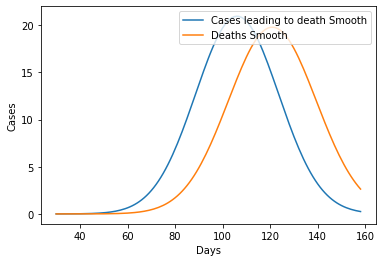

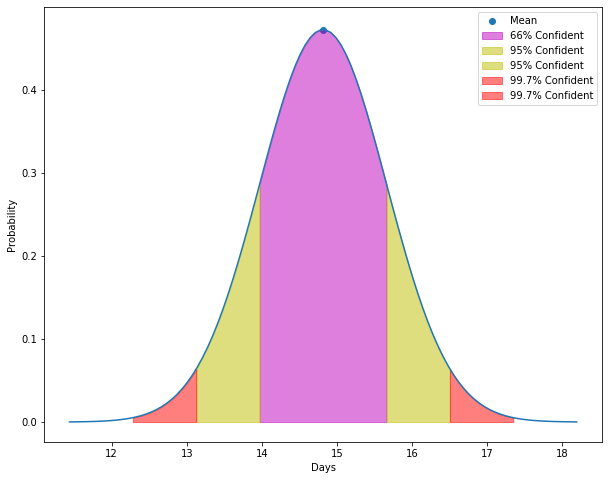

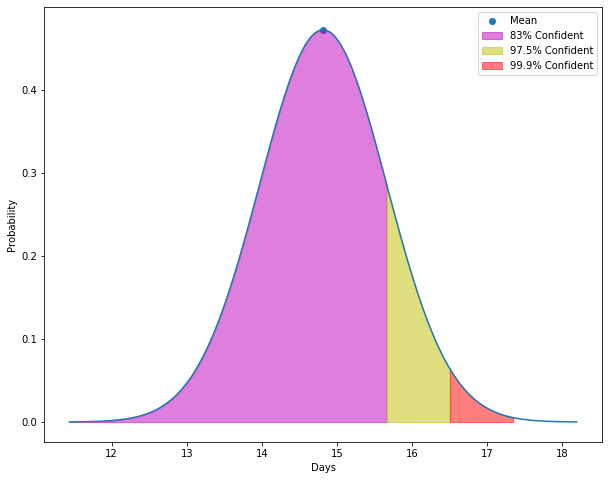

In [6]:
# Average Mortality Rate

averageMortalityRate = round((deathT / caseT),4)

def caseMortalityFunc (x,meanCase,stdCase,caseT,averageMortalityRate):
    expo = -(x-meanCase)**2 / (2*stdCase**2)
    return (caseT*averageMortalityRate/(stdCase*math.sqrt(2*math.pi))*np.exp(expo)) 

y_MortRate_fit = caseMortalityFunc(xdata, meanCase, stdCase, caseT, averageMortalityRate)


print("Average Mortality Rate(4dp): " + str(averageMortalityRate))

plt.figure(figsize=(6,4))
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(xdata, y_MortRate_fit, label = 'Cases leading to death Smooth')
plt.plot(xdata, z_fit, label = 'Deaths Smooth')
plt.legend(loc = 1)



#100(a-1)% confidence interval is z(a/2)
#95 confidence interval is a=1.95 aka a/2 = z0.975


confidenceInterval = 0.95
avalue = (confidenceInterval + 1)/2


#using stdCase meanCase stdDeath meanDeath
#meanX - meanY is normally distributed
#Confidence interval for difference in means pg210

ysum = 0
zsum = 0

for i in y_MortRate_fit:
    ysum += i 
    
for i in z_fit:
    zsum += i 
    
meanyz = meanDeath-meanCase
stdyz = math.sqrt(((stdCase**2)/ysum) + ((stdDeath**2)/zsum))


xyz = np.linspace(meanyz - 4*stdyz, meanyz + 4*stdyz, 100)


region1 = np.linspace(meanyz - 1*stdyz, meanyz + 1*stdyz, 100)

region2 = np.linspace(meanyz - 2*stdyz, meanyz - 1*stdyz, 100)
region3 = np.linspace(meanyz + 1*stdyz, meanyz + 2*stdyz, 100)

region4 = np.linspace(meanyz - 3*stdyz, meanyz - 2*stdyz, 100)
region5 = np.linspace(meanyz + 2*stdyz, meanyz + 3*stdyz, 100)


region6 = np.linspace(meanyz - 4*stdyz, meanyz + 1*stdyz, 100)
region7 = np.linspace(meanyz + 1*stdyz, meanyz + 2*stdyz, 100)
region8 = np.linspace(meanyz + 2*stdyz, meanyz + 3*stdyz, 100)


first_sdyz = st.norm.pdf(meanyz+stdyz,meanyz,stdyz)
second_sdyz = st.norm.pdf(meanyz+2*stdyz,meanyz,stdyz)
third_sdyz = st.norm.pdf(meanyz+3*stdyz,meanyz,stdyz)

plt.figure(figsize=(10,8))

plt.xlabel('Days')
plt.ylabel('Probability')
plt.plot(xyz, st.norm.pdf(xyz,meanyz,stdyz))
plt.scatter(meanyz, st.norm.pdf(meanyz,meanyz,stdyz), label = 'Mean')

plt.fill_between(region1,st.norm.pdf(region1,meanyz,stdyz), color='m', alpha = 0.5, label = '66% Confident')
plt.fill_between(region2,st.norm.pdf(region2,meanyz,stdyz), color='y', alpha = 0.5, label = '95% Confident')
plt.fill_between(region3,st.norm.pdf(region3,meanyz,stdyz), color='y', alpha = 0.5, label = '95% Confident')
plt.fill_between(region4,st.norm.pdf(region4,meanyz,stdyz), color='r', alpha = 0.5, label = '99.7% Confident')
plt.fill_between(region5,st.norm.pdf(region5,meanyz,stdyz), color='r', alpha = 0.5, label = '99.7% Confident')

plt.legend(loc = 1)


plt.figure(figsize = (10,8))

plt.xlabel('Days')
plt.ylabel('Probability')
plt.plot(xyz,st.norm.pdf(xyz,meanyz,stdyz))
plt.scatter(meanyz, st.norm.pdf(meanyz,meanyz,stdyz), label = 'Mean')

plt.fill_between(region6,st.norm.pdf(region6,meanyz,stdyz), color='m', alpha = 0.5, label = '83% Confident')
plt.fill_between(region7,st.norm.pdf(region7,meanyz,stdyz), color='y', alpha = 0.5, label = '97.5% Confident')
plt.fill_between(region8,st.norm.pdf(region8,meanyz,stdyz), color='r', alpha = 0.5, label = '99.9% Confident')

plt.legend(loc = 1)


#ppf turns p to z, cdf turns z to p
intervalLength = st.norm.ppf(avalue) * math.sqrt(((stdCase**2)/ysum) + ((stdDeath**2)/zsum))

lowerBound = round(meanDeath-meanCase - intervalLength,1)
upperBound = round(meanDeath-meanCase + intervalLength,1)

print("With " + str(confidenceInterval*100) + "% Confidence Interval: ")
print("Lower Bound: " + str(lowerBound))
print("Upper Bound: " + str(upperBound))

- I wanted a 95% Confidence interval, so a = 0.975
    -z_{0.975} = 1.96
    
For Japan:

Solving for the rest resulted in the result that if a patient died, there is (first graph):

    - a 66% chance it would be between 13.3 and 14.8 days (after contracting the disease)
    - a 95% chance it would be between 12.5 and 15.6 days 
    - a 97.5% chance it would be between 11.7 and 16.4 days
    

More importantly (on second graph),

    - there is a 83% chance it would be before 14.8 days
    - there is a 97.5% chance it would be less than 15.6 days 
    - there is a 99.9% chance it would be before 16.4 days 
    
These are percentages calculated based on the number of standard deviations away from the mean. We are not concerned about the chances on the left side (first graph), but more so on only the right (second graph). We can conclude that if all patients are released 17 days after being hospitalized, less than 1 in a 1000 of them will die.

This may seem like an unnecessary risk, but what if there are too many patients for the hospitals to take care of?

In times like these, where supply of healthcare is very limited, it is important to maximise the healthcare given to each patient to manimise the fatality rate overall. Thus, these numbers may come in very important as to when hospitals can safely release patients in a period of surplus.

## Modelling The Pandemic Using A SIRD MODEL

The SIRD model is a type of compartmental model which helps simplify the modelling of the COVID-19 disease.
The population goes through 4 stages, Susceptible, Infected, and Recovered or Deceased.

At first, they are susceptible (exposed) to the disease, contracts it and is infected, and eventually either recovers (is immune afterwards), or is deceased (has died).

The model is based on a set of differential equations which have been integrated and evaluated in a for loop over small changes in x (days). 

$$ \frac{dS}{dt} = - \frac{\beta IS}{N} $$

$$ \frac{dI}{dt} = \frac{\beta IS}{N} - \gamma I - \mu I $$

$$ \frac{dR}{dt} = \gamma I $$

$$ \frac{dD}{dt} = \mu I $$

It requires a few parameters:

$$ 1.Mortality Rate (\mu) $$
$$ 2.Recovery Rate (\gamma) $$
$$ 3.Infectious Rate (\beta) $$

$$ 4.Population Size $$
$$ 5.Initial Infected $$

As time passes, the rate of:
- infection decreases as measures such as social distancing are implemented by governments

- fatality decreases as better caution is taken by the population

- revocery increases as better medicine and healthcare is invented throughout the pandemic


I thus have created linear functions for these three rates to try and best represent them in a real life setting. They each have a maximum/minimum value to ensure that these rates stay between 0 and 1.



The model is useful in estimating various important data, such as:

- The maximum people infected at once (and when it will happen) and whether hospitals have enough vacancy to accomodate

- How long the epidemic will last

- How many people will die

- How changes in healthcare or interventions may affect the curve, and thus discover which methods are best 

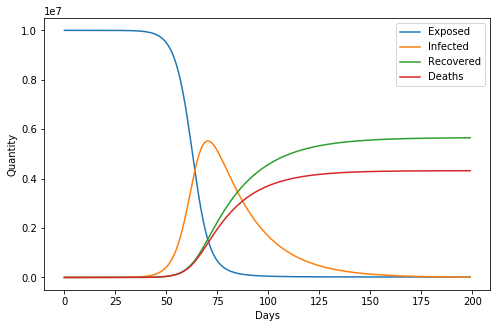

In [7]:
S = 10000000       #Susceptible to disease
I = 5               #Infected
R = 0               #Recovered
D = 0               #Died
N = S + I + R + D   #Total Population


leng = 200          #No of days in graph


Inew = 0 #Infected Today
Rnew = 0 #Recovered Today
Dnew = 0 #Died Today

time = np.arange(0, leng, 1)

arrS = np.zeros((leng))
arrI = np.zeros((leng))
arrR = np.zeros((leng))
arrD = np.zeros((leng))


for i in time:

    beta = 0.3
    gamma = min(0.02  + i/10000, 0.04) #0.02 to 0.04
    mu = max(0.01, 0.03 - i/10000) #0.03 to 0.01
    
    Inew = beta*I*S/N
    Rnew = gamma*I
    Dnew = mu*I
    
    S = max(0, S - Inew)
    I = max(0, I + Inew - Rnew - Dnew)
    R = max(0, min(N, R + Rnew))
    D = max(0, min(N, D + Dnew))

    arrS[i]= math.floor(S)
    arrI[i]= math.floor(I)
    arrR[i]= math.floor(R)
    arrD[i]= math.floor(D)
    
plt.figure(figsize=(8,5))
plt.plot(time, arrS, label = 'Exposed')
plt.plot(time, arrI, label = 'Infected')
plt.plot(time, arrR, label = 'Recovered')
plt.plot(time, arrD, label = 'Deaths')
plt.legend(loc = 1)
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.show()

In [8]:
results = pd.read_csv("ResultsCorona.csv", index_col = 'Country')

chicases = results.loc["Thailand":"Indonesia", "ChiCases(95%)(4.61)"]
chideath = results.loc["Thailand":"Indonesia", "ChiDeaths(95%)(4.61)"]


def boundIntervalColor(val):
    if val < 0:
        colorCode = 'red'
    elif val >= 0:
        colorCode = 'green'
        
    return 'background-color: %s' % colorCode

def chiColor95(val):
    if val < 4.61:
        colorCode = 'green'
        
    elif val >= 4.61:
        colorCode = 'red'
        
    return 'background-color: %s' % colorCode



colorResults = results.style.\
applymap(boundIntervalColor, subset=['LowerBound(95%CI)','UpperBound(95%CI)']).\
applymap(chiColor95, subset=['ChiCases(95%)(4.61)','ChiDeaths(95%)(4.61)']).\
highlight_max(subset = ['MortalityRate'], color = 'red').\
highlight_min(subset = ['MortalityRate'], color = 'green')

colorResults

,StartDate,EndDate,ChiCases(95%)(4.61),ChiDeaths(95%)(4.61),LowerBound(95%CI),UpperBound(95%CI),MortalityRate
Country,,,,,,,
Thailand,70,131,3.639000,1.802000,4.100000,12.100000,0.018600
Japan,70,160,1.732000,3.686000,12.500000,15.600000,0.054500
Italy,30,160,3.898000,3.600000,4.100000,4.700000,0.018700
Germany,70,160,2.097000,1.939000,10.900000,12.900000,0.047500
Canada,70,160,1.435000,1.075000,6.900000,8.100000,0.081600
New Zealand,70,131,17.891000,1.441000,8.600000,20.700000,0.014100
South Korea,30,131,55.989000,2.013000,13.000000,19.000000,0.023600
Australia,70,160,39.471000,2.691000,7.800000,16.300000,0.014000
Singapore,70,160,2.495000,1.954000,-22.200000,-1.300000,0.000700


### Conclusion and Analysis:

In conclusion, a total of 10 countries were tested, checking whether a normal distribution fit the observed cases, as well as finding a 95% confidence interval for the time from symptoms to death. The chi values obtained for the number of deaths suggest that the deaths follow a normal distribution while the chi value for cases suggest that the cases mostly follow a normal distribution.
    
The 95% confidence interval for the time between symptoms and deaths is very useful - on the probable case that a country has a lack of vacancy in a hospital and a surplus of patients, it may be useful to release patients at the upper bound as there is a very low chance that they will die (the chance would be the mortality rate multiplied by 0.025) and can take in new patients faster, overall reducing the number of deaths greatly. For example, Japan has a 95% confidence interval from 12.5 to 15.6. Releasing patients 16 days after they receive symptoms would give them a 99.864% chance of survival.


LowerBound and UpperBound shows negative values for Singapore and Indonesia. This is probably because Indonesia had delayed the reporting of cases, while Singapore does not have sufficient deaths, making the curve estimate unreliable.


    
Contries should report data properly. Like Indonesia's case, they reported fake data in the beginning of the pandemic, with a sudden 1790 cases on first update. This caused high chi values and a negative interval, which is unhelpful information for hospitals in Indonesia.

A large sample is required to form proper calculations. For example, Singapore had 25 deaths only, so a chi test was very unreliable. These calculations are affected too when there is another wave of cases; another source of transmission, such as singapore's worker's dorm case. The calculations are reliable when there is no external factors. In practice, it is hard to keep a controlled environment even with quarantine and lockdown. 

The cases of some countries tend to follow a positively skewed distribution. This is the case for South Korea, New Zealand and Australia, which have a second rise in cases, a prolonged peak and a prolonged tail respectively. It is possible that the cases follow a positively skewed distribution instead of a normal distribution.